## Lahman's Baseball Database

Use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

Download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import sqlite3 as sql
import matplotlib.pyplot as plt

In [2]:
db = sql.connect("/Users/yichuan/Downloads/baseball.sqlite")
db

## Part One 

In the first part, I am interested in these four questions about payroll:

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. Are there anomalies in the payrolls over this time period? 

4. How do the top 5 teams compare to other teams?

Conclusions:

__1. The results showed that "New York Highlanders(NYA)", "Philadelphia Blue Jays(PHI)", "Detroit Tigers(DET)", "Boston Americans(BOS)" and "Chicago Colts(CHN)" had the highest payrolls.__

__2. Generally, payrolls of all the teams increased over this time period.__

__3. a) There are 2 anomalies:__

2014-2016, payroll of Philadelphia Blue Jays reduced substancially;
2010-2014, payroll of Chicago Colts reduced substancially.

   b) Explain:
Team performance is the main cause of these two anomalies.

From the plots of salary of each player, find:1)during the reduction year, the highest salary among players reduced substantially; 2)players were changed and some high-salary players were substituded by low-salary players.

From Wikipedia,
1) Winning percentage of PHI declined from 0.599(2010) to 0.389(2015) and team struggled around 0.4. What is more, in 2015, team changed managers several times to improve team performance. From this I can see that performance of this team is the main cause of reduction in payroll. 
2) As for CHN, there are news that clearly shows that 2010–2014 is the decline and rebuild period of CHN. The team struggled to win. So I can see that performance of team is also the main cause of reduction in payroll.

I also investgate if the reduction in payroll is because of reduction in the number of players. From the tables below, I can see number of players was fluctuating. Since the trend of payroll is reducing not fluctuating, number of players is not the main cause.

__4. Differences in payrolls of top 5 teams and others:__

1) Scale of Payroll
The lowest payroll of top 5 teams is 0.75+e10. Compare this number with payrolls of non-top 5 teams, I can see around 2/3 teams have never exceed this number. Thus I can see, payrolls of top 5 teams are higher than most teams.

From two plots of top 5 and non-top 5, I can see the highest payroll among non-top 5 teams is 1.75+e10. Compare this number with payrolls of top 5 teams, though payroll of New York Highlanders is always higher than others and Boston Americans is approximately higher than others, the other 3 teams in top 5 all had a large time when payrolls were lower than this number. So due to the fluctuations of payrolls of top 5 teams, not all of them have absolutely higher payroll than non-top 5 teams. 

2) Fluctuation of Payroll
As for non-top 5 teams, most of them have payrolls lower than 0.5+e10 and for these teams, their payrolls not fluctuate as severely as some of teams among top 5. As for other teams, they also fluctuate severely.

In [3]:
pd.read_sql("""
    SELECT * FROM salaries
    WHERE yearID BETWEEN '2006' AND '2016'
""", db).head()

,yearID,teamID,lgID,playerID,salary
0,2006,ARI,NL,aquingr01,342000
1,2006,ARI,NL,batismi01,4750000
2,2006,ARI,NL,byrneer01,2250000
3,2006,ARI,NL,clarkto02,1034000
4,2006,ARI,NL,counscr01,1750000


In [4]:
df=pd.read_sql("""    
    SELECT yearID,teamID,name,SUM(salary)as total FROM
    (
    SELECT l.yearID,l.teamID,l.salary,r.name FROM 
        salaries as l
    LEFT JOIN
        teams as r
    on l.teamID=r.teamID
    )
    WHERE yearID BETWEEN '2006' AND '2016'
    GROUP BY teamID,yearID
""",db)
df.dtypes

yearID     int64
teamID    object
name      object
total      int64
dtype: object

In [5]:
df1=df.sort_values(by=['total'],ascending=False)
df1.drop_duplicates(subset="name").iloc[0:5,]

,yearID,teamID,name,total
227,2013,NYA,New York Highlanders,26909550776
260,2014,PHI,Philadelphia Blue Jays,24608515512
309,2016,DET,Detroit Tigers,22995424758
303,2016,BOS,Boston Americans,22248399798
305,2016,CHN,Chicago Colts,22031676524


In [64]:
df["teamID"].value_counts()

MIN    11
DET    11
SDN    11
MIL    11
ATL    11
NYN    11
COL    11
HOU    11
SEA    11
BOS    11
SLN    11
KCA    11
TBA    11
SFN    11
ARI    11
TEX    11
PIT    11
NYA    11
LAA    11
OAK    11
CHA    11
CLE    11
BAL    11
LAN    11
CIN    11
PHI    11
WAS    11
TOR    11
CHN    11
FLO     6
MIA     5
Name: teamID, dtype: int64

In [6]:
df2=df.sort_values(['teamID'], ascending=1)
df21=df2.iloc[0:160,]
df22=df2.iloc[161:330,]

(0, 28000000000)

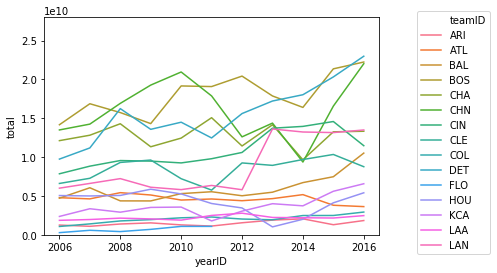

In [14]:
# Since there are too many teams, plot them seperately to compare them clearly.
ax=sns.lineplot("yearID","total",hue="teamID",data=df21)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.axes.set_ylim(0,28000000000)

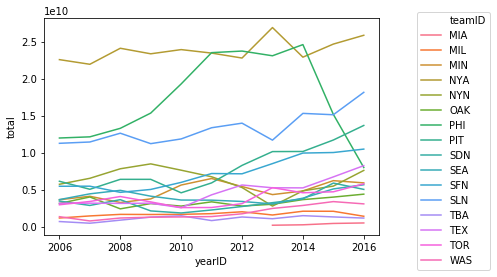

In [75]:
ax=sns.lineplot("yearID","total",hue="teamID",data=df22)
ax.legend(bbox_to_anchor=(1.1, 1.05))

Two anomalies:

2014-2016, payroll of Philadelphia Blue Jays reduced substancially.

2010-2014, payroll of Chicago Colts reduced substancially.

In [15]:
pd.read_sql("""    
    SELECT yearID,teamID,COUNT(*) as total FROM salaries
    WHERE yearID BETWEEN '2006' AND '2016'
    AND teamID="PHI"
    GROUP BY yearID
""",db).head()

,yearID,teamID,total
0,2006,PHI,27
1,2007,PHI,30
2,2008,PHI,28
3,2009,PHI,27
4,2010,PHI,28


Text(0.5, 1.0, '2013-2014')

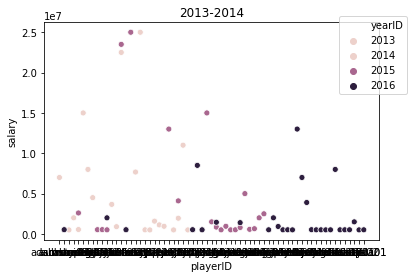

In [64]:
df31=pd.read_sql("""    
    SELECT yearID,teamID,playerID,salary FROM salaries
    WHERE yearID BETWEEN 2014 AND 2016
    AND teamID="PHI"
""",db)

ax=sns.scatterplot("playerID","salary",hue="yearID",data=df31)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.set_title('2013-2014')

In [67]:
df32=pd.read_sql("""    
    SELECT yearID,teamID,playerID,salary FROM salaries
    WHERE yearID BETWEEN '2010' AND '2014'
    AND teamID="CHN"
""",db)

Text(0.5, 1.0, '2009-2010')

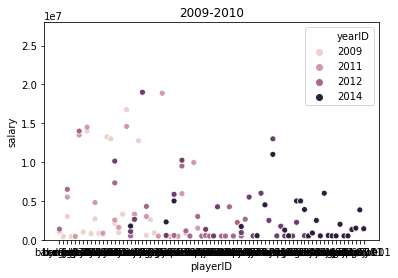

In [68]:
ax=sns.scatterplot("playerID","salary",hue="yearID",data=df32)
ax.axes.set_ylim(0,28000000)
ax.set_title('2009-2010')

In [91]:
# see how the number of players change
pd.read_sql("""    
    SELECT yearID,teamID,COUNT(*) as total FROM salaries
    WHERE yearID BETWEEN '2006' AND '2016'
    AND teamID="CHN"
    GROUP BY yearID
""",db)

,yearID,teamID,total
0,2006,CHN,28
1,2007,CHN,27
2,2008,CHN,27
3,2009,CHN,25
4,2010,CHN,27
5,2011,CHN,25
6,2012,CHN,26
7,2013,CHN,26
8,2014,CHN,27
9,2015,CHN,28


Compare the top 5 teams compare to other teams.


In [60]:
team=("NYA","PHI","DET","BOS","CHN")
df4=df.loc[df["teamID"].isin(team)]

(0, 28000000000)

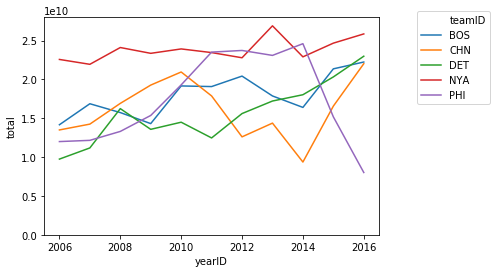

In [63]:
ax=sns.lineplot("yearID","total",hue="teamID",data=df4)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.axes.set_ylim(0,28000000000)

In [61]:
df42=df[np.logical_not(df["teamID"].isin(team))]

(0, 28000000000)

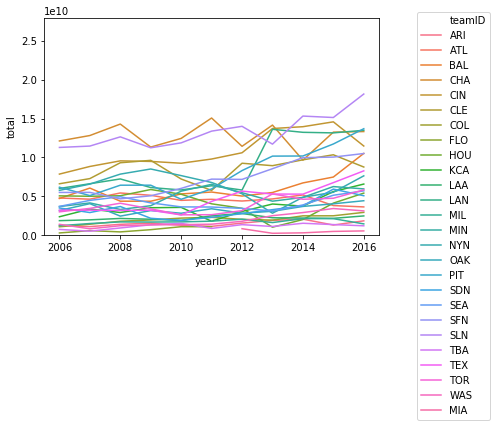

In [62]:
ax=sns.lineplot("yearID","total",hue="teamID",data=df42)
ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.axes.set_ylim(0,28000000000)

## Part Two

This part I focused on performance of players.

1. Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?
2. How much have salaries increased over the years in real dollars? Is there a corresponding increase in performance?
3. Is it common for players to be good at several positions? How is salary correlated with this?

__1. Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?__

Data Cleaning:

First, get the information of the number of records of each player in the database and the number of teams each player have worked for. Then deleted the rows of players, about whom there is only one record. Because with the limitation of records, even if they only have worked for one team, it still can not ba a proof of their loyalty to the team. 

Then use the data of players who have worked for at least two teams.

Conclusions: 

a) From the result, I can see there are 278 players(58.5%) who have played for at least two teams. Since around half of players have switched teams, I can say it is common for players to switch teams.

b) This changed over time. In recently years, there are more and more players switched teams over 5 times. I seperated the data into two groups:1871-1945 and 1946-2018. For this two groups, the proportion of people who have worked on at least two teams are approximately the same. But in the plots of frequency distribution, the tail of first group is longer than second group, which means the number of second group of people who have worked on more than 5 teams is larger than the first group.

c) Bob Furgoson has been on the most teams and he was on 9 teams. Frank Bankcroft and Jack Chapman are the second. They were on 7 teams.


In [70]:
date=pd.read_sql("""
    SELECT DISTINCT yearID FROM managers
    ORDER BY yearID
""", db)
date.head()
date.tail()

,yearID
143,2014
144,2015
145,2016
146,2017
147,2018


In [72]:
player=pd.read_sql("""
    SELECT *,COUNT(*) as recNUM FROM managers
    GROUP BY playerID
""", db)
player.head()

,playerID,yearID,teamID,lgID,inseason,G,W,L,rank,plyrMgr,recNUM
0,actama99,2007,WAS,NL,1,162,73,89,4.0,N,6
1,adairbi99,1970,CHA,AL,2,10,4,6,6.0,N,1
2,adcocjo01,1967,CLE,AL,1,162,75,87,8.0,N,1
3,addybo01,1875,PH2,None,2,7,3,4,5.0,Y,2
4,allenbo01,1890,PHI,NL,4,35,25,10,3.0,Y,2


In [73]:
player_teamNUM=pd.read_sql("""
    SELECT *,count(*) as teamNUM FROM
    (
    SELECT DISTINCT * FROM
    (
    SELECT playerID, teamID FROM managers
    )
    )
    GROUP BY playerID
""",db)

In [74]:
data=pd.merge(player,player_teamNUM, how='left',left_on="playerID",right_on="playerID")
data.head()

,playerID,yearID,teamID_x,lgID,inseason,G,W,L,rank,plyrMgr,recNUM,teamID_y,teamNUM
0,actama99,2007,WAS,NL,1,162,73,89,4.0,N,6,WAS,2
1,adairbi99,1970,CHA,AL,2,10,4,6,6.0,N,1,CHA,1
2,adcocjo01,1967,CLE,AL,1,162,75,87,8.0,N,1,CLE,1
3,addybo01,1875,PH2,None,2,7,3,4,5.0,Y,2,PH2,2
4,allenbo01,1890,PHI,NL,4,35,25,10,3.0,Y,2,PHI,2


In [75]:
name=pd.read_sql("SELECT playerID,namefirst,namelast FROM people", db)
data=pd.merge(data,name, how='left',left_on="playerID",right_on="playerID")
data.head()

,playerID,yearID,teamID_x,lgID,inseason,G,W,L,rank,plyrMgr,recNUM,teamID_y,teamNUM,nameFirst,nameLast
0,actama99,2007,WAS,NL,1,162,73,89,4.0,N,6,WAS,2,Manny,Acta
1,adairbi99,1970,CHA,AL,2,10,4,6,6.0,N,1,CHA,1,Bill,Adair
2,adcocjo01,1967,CLE,AL,1,162,75,87,8.0,N,1,CLE,1,Joe,Adcock
3,addybo01,1875,PH2,None,2,7,3,4,5.0,Y,2,PH2,2,Bob,Addy
4,allenbo01,1890,PHI,NL,4,35,25,10,3.0,Y,2,PHI,2,Bob,Allen


In [79]:
# delete data on players that only have one record in database.
data=data.loc[data["recNUM"]!=1]

In [78]:
len(data.loc[data["teamNUM"]!=1])

278

Text(0.5, 1.0, 'Total')

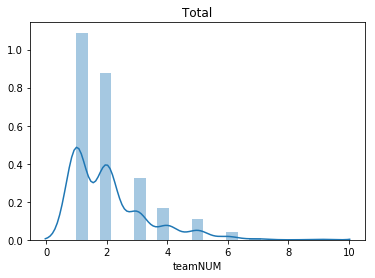

In [81]:
dist=sns.distplot(data["teamNUM"])
dist.set_title('Total')

In [82]:
player=pd.read_sql("""
    SELECT *,COUNT(*) as recNUM FROM managers
    WHERE yearID BETWEEN '1871' AND '1945'
    GROUP BY playerID
""", db)
player_teamNUM=pd.read_sql("""
    SELECT *,count(*) as teamNUM FROM
    (
    SELECT DISTINCT * FROM
    (
    SELECT playerID, teamID FROM managers
    WHERE yearID BETWEEN '1871' AND '1945'
    )
    )
    GROUP BY playerID
""",db)
data=pd.merge(player,player_teamNUM, how='left',left_on="playerID",right_on="playerID")
name=pd.read_sql("SELECT playerID,namefirst,namelast FROM people", db)
data=pd.merge(data,name, how='left',left_on="playerID",right_on="playerID")
data.sort_values(by="teamNUM",ascending=False)
len(data) #354
len(data.loc[data["teamNUM"]!=1]) #123

123

Text(0.5, 1.0, '1871-1945')

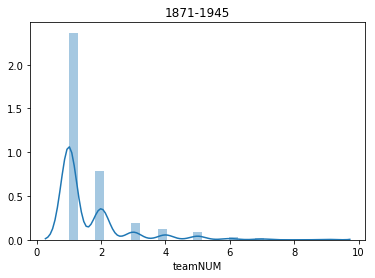

In [83]:
dist=sns.distplot(data["teamNUM"])
dist.set_title('1871-1945')

In [84]:
player=pd.read_sql("""
    SELECT *,COUNT(*) as recNUM FROM managers
    WHERE yearID BETWEEN '1946' AND '2018'
    GROUP BY playerID
""", db)
player_teamNUM=pd.read_sql("""
    SELECT *,count(*) as teamNUM FROM
    (
    SELECT DISTINCT * FROM
    (
    SELECT playerID, teamID FROM managers
    WHERE yearID BETWEEN '1946' AND '2018'
    )
    )
    GROUP BY playerID
""",db)
data=pd.merge(player,player_teamNUM, how='left',left_on="playerID",right_on="playerID")
len(data) #377
len(data.loc[data["teamNUM"]!=1]) #158

158

Text(0.5, 1.0, '1946-2018')

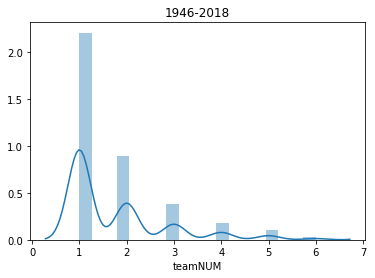

In [87]:
dist=sns.distplot(data["teamNUM"])
dist.set_title('1946-2018')


Conclusions: 

__2. How much have salaries increased over the years in real dollars? Is there a corresponding increase in performance?__

First, by exploring data of batting and pitching, I select five criterias: total number of games(Gtotal), number of games started(GS), number of complete games(GC), batting average(BA) and earned run average(ERA). Second, I choose three criterias: total number of games and batting average(BA), to calculate the correlation between these three criterias and real dollar salary.

By plotting the correlation coefficient against players index, I can see the points distributed asymmetrically around zero, which means there is no obvious positive or negetive correlation between salary and players performance.

Then I suspect things would be different for players with salary level above average, since these players would value their performance and reputations more, therefore work harder with higher salary. So I repeat these analysis on players with salary higher than average level. But the result still shows that correlation points asymmetrically distributed around zero. So there is no obvious positive or negetive correlation between salary and players performance.

In [89]:
salary=pd.read_sql("""
    SELECT * FROM salaries
""",db)
# 1985-2016

Download information of CPI from American [Bureau of Labor Statistics](https://www.bls.gov/cpi/data.htm) and import.

In [99]:
cpi=pd.read_excel("/Users/yichuan/Downloads/cpi1985.xlsx")
cpi.head()

,Year,Annual
0,1985,109.3
1,1986,110.5
2,1987,115.4
3,1988,120.5
4,1989,126.1


In [100]:
salary=pd.merge(salary,cpi,how='left',left_on="yearID",right_on="Year")
salary["real_s"]=salary["salary"]/(salary["Annual"]/109.3)
salary=pd.merge(salary,name, how='left',left_on="playerID",right_on="playerID")
salary.head()

,yearID,teamID,lgID,playerID,salary,Year,Annual,real_s,nameFirst,nameLast
0,1985,ATL,NL,barkele01,870000,1985,109.3,870000.0,Len,Barker
1,1985,ATL,NL,bedrost01,550000,1985,109.3,550000.0,Steve,Bedrosian
2,1985,ATL,NL,benedbr01,545000,1985,109.3,545000.0,Bruce,Benedict
3,1985,ATL,NL,campri01,633333,1985,109.3,633333.0,Rick,Camp
4,1985,ATL,NL,ceronri01,625000,1985,109.3,625000.0,Rick,Cerone


In [91]:
pitch=pd.read_sql("""
    SELECT playerID,yearID,teamID,G,GS,CG,ERA FROM pitching
""",db)
bat=pd.read_sql("""
    SELECT playerID,yearID,teamID,H,AB,G FROM Batting
""",db)
bat["BA"]=bat["H"]/bat["AB"]

In [92]:
performance=pd.merge(bat,pitch,how="inner",left_on="playerID",right_on="playerID")
performance=performance.drop(['H', 'AB','yearID_y','teamID_y'], axis=1)
x=performance.groupby(["playerID","yearID_x","teamID_x"])
performance=x.aggregate(np.sum)
performance.head(10)

G_x   BA  G_y  GS  CG    ERA
playerID  yearID_x teamID_x                              
aardsda01 2004     SFN        99  0.0  331   0   0  46.75
          2006     CHN       405  0.0  331   0   0  46.75
          2007     CHA       225  0.0  331   0   0  46.75
          2008     BOS       423  0.0  331   0   0  46.75
          2009     SEA       657  0.0  331   0   0  46.75
          2010     SEA       477  0.0  331   0   0  46.75
          2012     NYA         9  0.0  331   0   0  46.75
          2013     NYN       387  0.0  331   0   0  46.75
          2015     ATL       297  0.0  331   0   0  46.75
aasedo01  1977     BOS       169  0.0  448  91  22  45.41

In [101]:
data=pd.merge(performance, salary, right_on=['playerID', 'yearID','teamID'],left_on=['playerID', 'yearID_x','teamID_x'])
data["Gtotal"]=data["G_x"]+data["G_y"]


In [102]:
data.head()

,playerID,G_x,BA,G_y,GS,CG,ERA,yearID,teamID,lgID,salary,Year,Annual,real_s,nameFirst,nameLast,Gtotal
0,aardsda01,99,0.0,331,0,0,46.75,2004,SFN,NL,300000,2004,190.300,1.723069e+05,David,Aardsma,430
1,aardsda01,225,0.0,331,0,0,46.75,2007,CHA,AL,387500,2007,210.000,2.016845e+05,David,Aardsma,556
2,aardsda01,423,0.0,331,0,0,46.75,2008,BOS,AL,403250,2008,210.228,2.096544e+05,David,Aardsma,754
3,aardsda01,657,0.0,331,0,0,46.75,2009,SEA,AL,419000,2009,215.949,2.120718e+05,David,Aardsma,988
4,aardsda01,477,0.0,331,0,0,46.75,2010,SEA,AL,2750000,2010,219.179,1.371368e+06,David,Aardsma,808


Text(0.5, 1.0, 'Distribtuion of Correlation(Salary&Number of Games)')

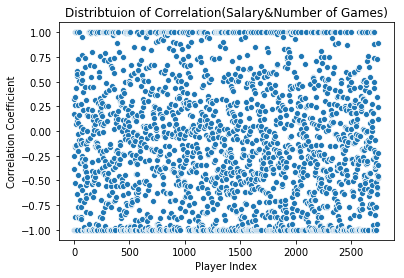

In [119]:
# Correlation of real dollar salary with number of total games each player played in each year
corr=data.groupby('playerID')[['real_s','Gtotal']].corr().iloc[0::2,-1]
type(corr)
corr_df=pd.DataFrame(corr)
corr_df=corr_df.reset_index()
corr_df=corr_df.reset_index()
ax=sns.scatterplot("index","Gtotal",data=corr_df)
ax.set_ylabel('Correlation Coefficient')
ax.set_xlabel('Player Index')
ax.set_title('Distribtuion of Correlation(Salary&Number of Games)')

Text(0.5, 1.0, 'Distribtuion of Correlation(Salary&BA)')

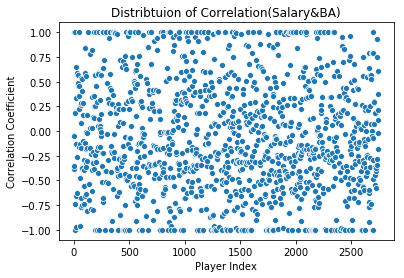

In [118]:
corr=data.groupby('playerID')[['real_s','BA']].corr().iloc[0::2,-1]
corr_df=pd.DataFrame(corr)
corr_df=corr_df.reset_index()
corr_df=corr_df.reset_index()
ax=sns.scatterplot("index","BA",data=corr_df)
ax.set_ylabel('Correlation Coefficient')
ax.set_xlabel('Player Index')
ax.set_title('Distribtuion of Correlation(Salary&BA)')

In [114]:
## subset data of players that have salaries higher than average
ave=sum(data["real_s"])/13021
data_above=data[data["real_s"]>ave]

Text(0.5, 1.0, 'Distribtuion of Correlation(Salary&BA)')

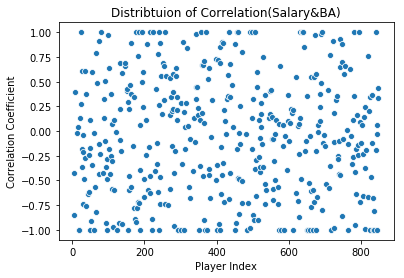

In [117]:
corr=data_above.groupby('playerID')[['real_s','BA']].corr().iloc[0::2,-1]
corr_df=pd.DataFrame(corr)
corr_df=corr_df.reset_index()
corr_df=corr_df.reset_index()
ax=sns.scatterplot("index","BA",data=corr_df)
ax.set_ylabel('Correlation Coefficient')
ax.set_xlabel('Player Index')
ax.set_title('Distribtuion of Correlation(Salary&BA)')

Conclusions: 

__3. Is it common for players to be good at several positions? How is salary correlated with this?__

According to wikipedia, baseball positions can be seperated into three categories: pitchers, defensive players and offensive players.

First, for a certain role, if the total number of games a player palyed as that role is larger than 80% of total games that player played, then plus 1 to the score of this player. Then each player get a score for each year. If the player played several roles in the games he played, he will get a higher score. 

Second, I calculate the correlation of score and salary. The result is 0.265. 
Third, control the influence of time by seperating the data by years, I calculate the correlation of score and salary of players in each year. From the plot of these correlations, I can see all of them are positive. 
So I can conclude that the correlation of salary and all-round ability is positive.

In [120]:
data23=pd.read_sql("""
    SELECT yearID, G_all,playerID, teamID,GS,G_batting,G_defense FROM Appearances
""",db)
data23["0.8all"]=0.8*data23["G_all"]

In [121]:
data23["score"]=0

def f(row):
    if row['GS'] >= row['0.8all']:
        row['score']=row['score']+1
    if row['G_batting'] >= row['0.8all']:
        row['score']=row['score']+1
    if row['G_defense'] >= row['0.8all']:
        row['score']=row['score']+1
    return row['score']

In [122]:
data23['score'] = data23.apply(f, axis=1)
data23=pd.merge(data23,salary,right_on=['playerID', 'yearID','teamID'],left_on=['playerID', 'yearID','teamID'])
data23.head()

,yearID,G_all,playerID,teamID,GS,G_batting,G_defense,0.8all,score,lgID,salary,Year,Annual,real_s,nameFirst,nameLast
0,1985,61,ackerji01,TOR,0.0,0,61.0,48.8,1,AL,170000,1985,109.3,170000.0,Jim,Acker
1,1985,54,agostju01,CHA,0.0,4,54.0,43.2,1,AL,147500,1985,109.3,147500.0,Juan,Agosto
2,1985,91,aguaylu01,PHI,42.0,91,82.0,72.8,2,NL,237000,1985,109.3,237000.0,Luis,Aguayo
3,1985,36,alexado01,TOR,36.0,0,36.0,28.8,2,AL,875000,1985,109.3,875000.0,Doyle,Alexander
4,1985,23,allenne01,SLN,1.0,23,23.0,18.4,2,NL,750000,1985,109.3,750000.0,Neil,Allen


Text(0.5, 1.0, 'Distribtuion of Correlation(Salary&Performance)')

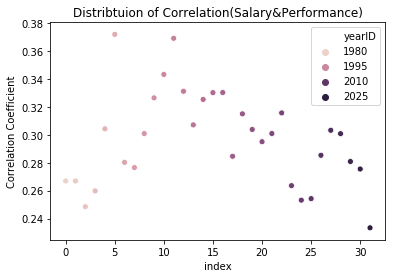

In [125]:
corr=data23.groupby('yearID')[['score','real_s']].corr().iloc[0::2,-1]
corr_df=pd.DataFrame(corr)
corr_df=corr_df.reset_index()
corr_df=corr_df.reset_index()
ax=sns.scatterplot("index","real_s",hue="yearID",data=corr_df)
ax.set_ylabel('Correlation Coefficient')
ax.set_title('Distribtuion of Correlation(Salary&Performance)')

In [445]:
data23['score'].corr(data23['real_s'])

0.26523170724659856